In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names 

iris_df = pd.DataFrame(X, columns = feature_names)
iris_df['target'] = y

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
selector = SelectKBest(score_func=chi2, k='all')
X_selected = selector.fit_transform(X_scaled, y)

scores = selector.scores_
results_df = pd.DataFrame({'Feature': feature_names, 'Chi2 Score': scores})
results_df = results_df.sort_values(by='Chi2 Score', ascending=False)
print(results_df)




             Feature  Chi2 Score
3   petal width (cm)   30.478068
2  petal length (cm)   26.861936
0  sepal length (cm)   11.377274
1   sepal width (cm)    4.470734


In [9]:
scores = mutual_info_classif(X, y)
results_df = pd.DataFrame({'Feature': feature_names, 'Mutual Information Score': scores})
results_df = results_df.sort_values(by='Mutual Information Score', ascending=False)
print(results_df)

             Feature  Mutual Information Score
3   petal width (cm)                  0.998926
2  petal length (cm)                  0.985764
0  sepal length (cm)                  0.494063
1   sepal width (cm)                  0.235611


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
knn = KNeighborsClassifier(n_neighbors=3)

for n_features in range(1, len(feature_names)):
    sfs = SequentialFeatureSelector(knn, n_features_to_select=n_features)
    sfs.fit(X_train, y_train)
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)
    selected_features = sfs.get_support(indices=True)
    knn.fit(X_train_sfs, y_train)
    accuracy = knn.score(X_test_sfs, y_test)
    print(f'Number of features: {n_features}, Selected features: {selected_features}, Accuracy: {accuracy}')
    

    

Number of features: 1, Selected features: [2], Accuracy: 0.9066666666666666
Number of features: 2, Selected features: [0 2], Accuracy: 0.92
Number of features: 3, Selected features: [0 1 2], Accuracy: 0.8933333333333333


Random Forest Accuracy: 0.9466666666666667
             Feature  Importance
2  petal length (cm)    0.425774
3   petal width (cm)    0.417584
0  sepal length (cm)    0.130289
1   sepal width (cm)    0.026353


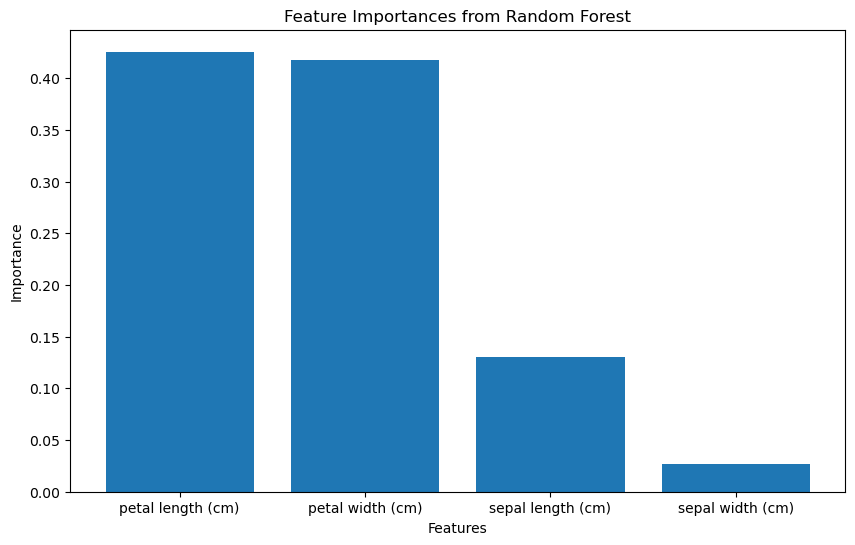

In [17]:
rf_class = RandomForestClassifier(n_estimators=100, random_state=1)
rf_class.fit(X_train, y_train)

feature_importances = rf_class.feature_importances_
results_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
results_df = results_df.sort_values(by='Importance', ascending=False)

accuracy = rf_class.score(X_test, y_test)
print(f'Random Forest Accuracy: {accuracy}')
print(results_df)

plt.figure(figsize=(10,6))
plt.bar(results_df['Feature'], results_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()



Explained variance by each component: [0.92461872 0.05306648]


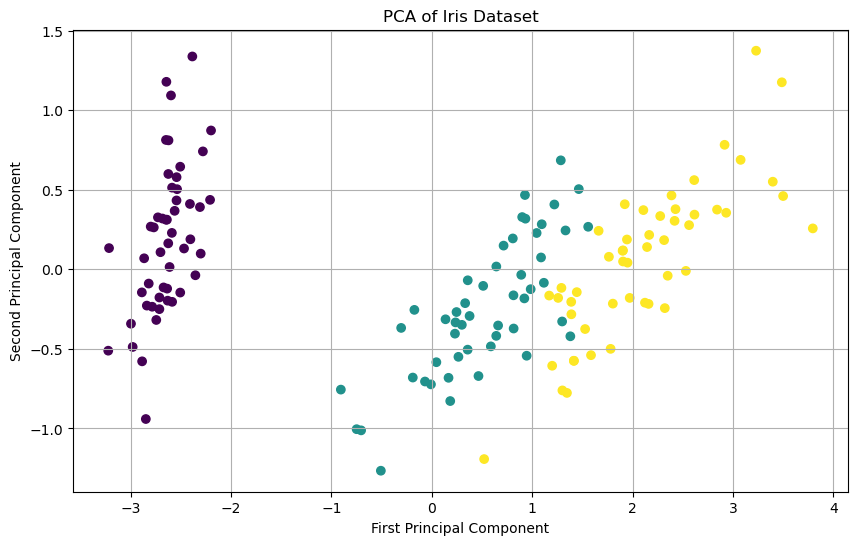

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA of Iris Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()



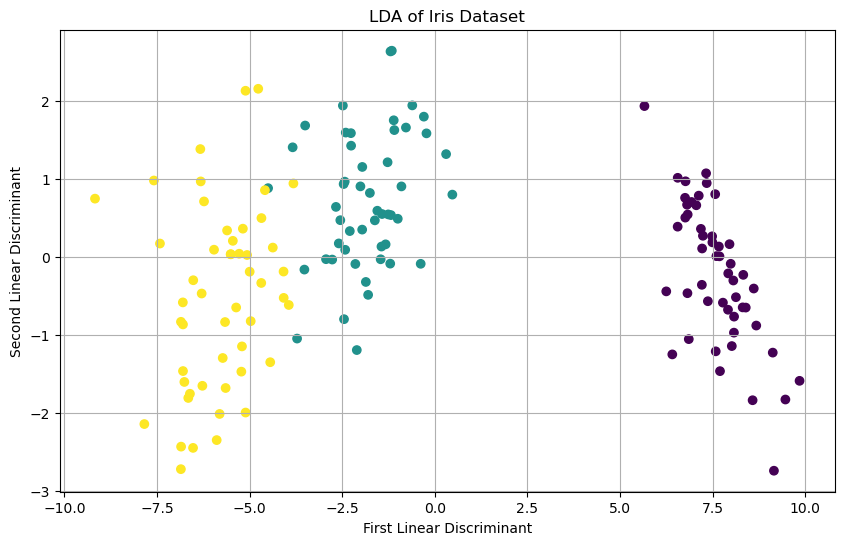

In [27]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(10,6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
plt.title('LDA of Iris Dataset')
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant')
plt.grid(True)
plt.show()


Looks like LDA might be a bit better than PCA at separating out classes. 

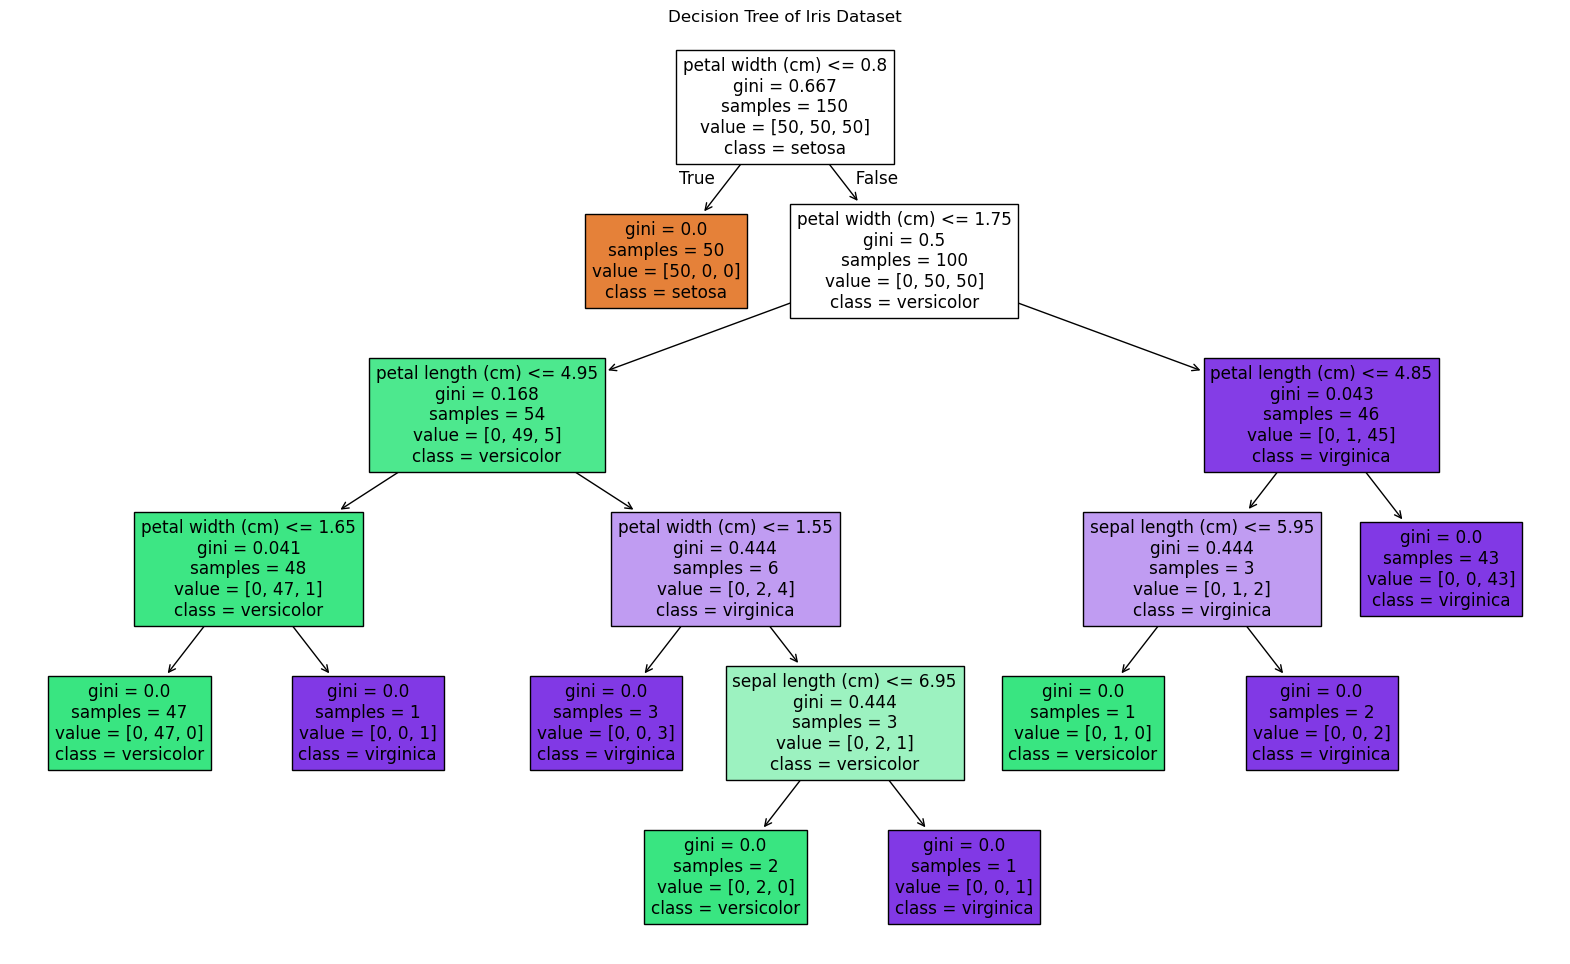

In [30]:
tree_class = DecisionTreeClassifier(random_state=1)
tree_class.fit(X, y)

importances = tree_class.feature_importances_
results_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

plt.figure(figsize=(20,12))
plot_tree(tree_class, feature_names=feature_names, class_names=iris.target_names, filled=True)

plt.title('Decision Tree of Iris Dataset')
plt.show()

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)     0.426658
Name: target, dtype: float64


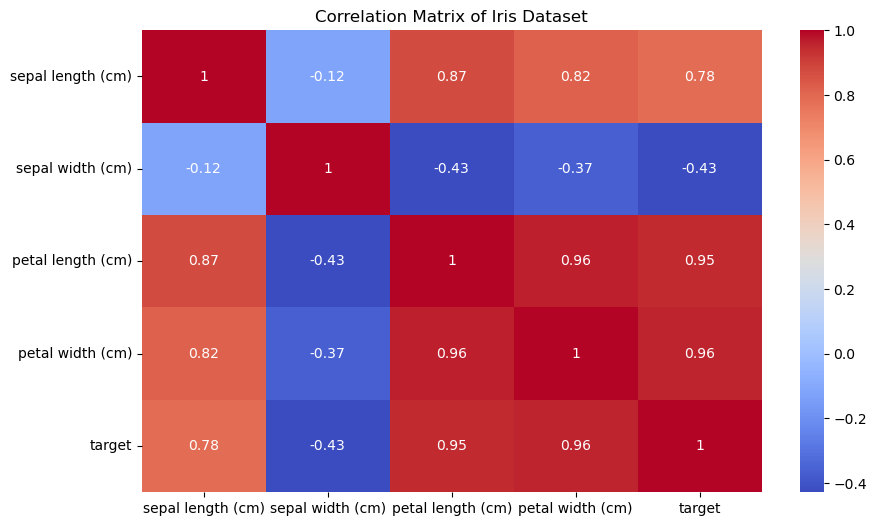

In [33]:
corr_matrix = iris_df.corr()

target_corr = corr_matrix['target'].abs().sort_values(ascending=False)
print(target_corr)

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Iris Dataset')
plt.show()


In [49]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
logreg = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
logreg.fit(X_scaled, y)
    
coeffs = logreg.coef_[0]

l1_results = pd.DataFrame({'Feature': feature_names, 'Coefficient': coeffs.flatten()})
print(l1_results)


             Feature  Coefficient
0  sepal length (cm)     0.000000
1   sepal width (cm)     0.000000
2  petal length (cm)   -12.050045
3   petal width (cm)    -1.203517
